In [2]:
from os import listdir
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util import *

In [119]:
# description: Edges represent fiber tracts that connect one vertex to another
dir_ = '../data/bnphp/'

def handle(x):
    if type(x) == type(''):
        x = x.strip()
        if 'K' in x:   return int(x[:-1])*1000
        elif 'M' in x: return int(x[:-1])*1000000
        elif 'B' in x: return int(x[:-1])*1000000000
        elif 'G' in x: return int(x[:-1])*1000000000000
        elif '-' in x: return np.nan
        elif '.' in x: return float(x)
        else:          return int(x)
    else:              return x

In [120]:
brainset = pd.read_excel(dir_ + 'bnphp.xlsx')

# change string to integer or float
brainset = brainset.apply(lambda x: x.apply(handle) if x.name not in ['Graph Name'] else x)

human = brainset[brainset['Graph Name'].apply(lambda x: x.split('-')[0] == 'human')]
cat = brainset[brainset['Graph Name'].apply(lambda x: x.split('-')[0] == 'cat')]
macaque = brainset[brainset['Graph Name'].apply(lambda x: x.split('-')[0] == 'macaque')]
fly = brainset[brainset['Graph Name'].apply(lambda x: x.split('-')[0] == 'fly')]
mouse = brainset[brainset['Graph Name'].apply(lambda x: x.split('-')[0] == 'mouse')]

human.head()

,Graph Name,|V|,|E|,dmax,davg,r,|T|,Tavg,Tmax,κavg,κ,K,ωheu
2,human-BNU-1-0025864-session-1-bg,696000,143000000,15000,411,0.44,6.000000e+10,86000.0,8000000.0,0.52,0.32,1000,106
3,human-BNU-1-0025864-session-2-bg,693000,134000000,8000,385,0.47,5.100000e+10,74000.0,4000000.0,0.52,0.32,1000,129
4,human-BNU-1-0025865-session-1-bg,735000,166000000,8000,451,0.35,6.200000e+10,85000.0,5000000.0,0.51,0.31,1000,218
5,human-BNU-1-0025865-session-2-bg,715000,155000000,10000,434,0.35,5.500000e+10,77000.0,4000000.0,0.51,0.31,955,98
6,human-BNU-1-0025867-session-1-bg,747000,145000000,8000,388,0.38,4.900000e+10,66000.0,4000000.0,0.51,0.31,881,123


C:\Users\jwcn9\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


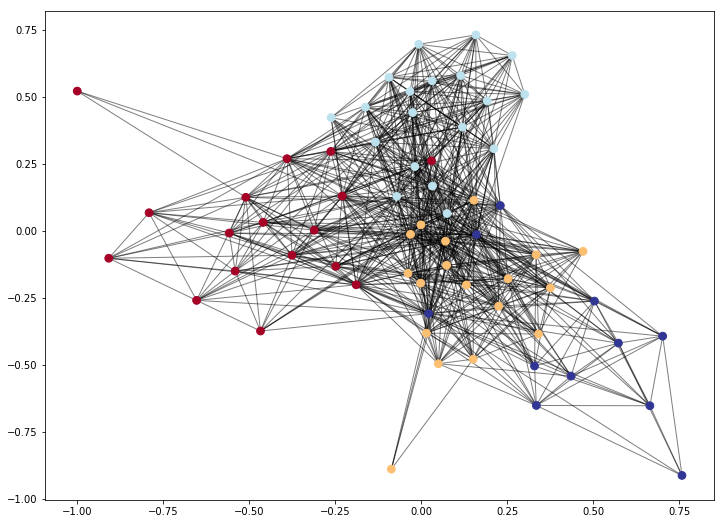

C:\Users\jwcn9\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


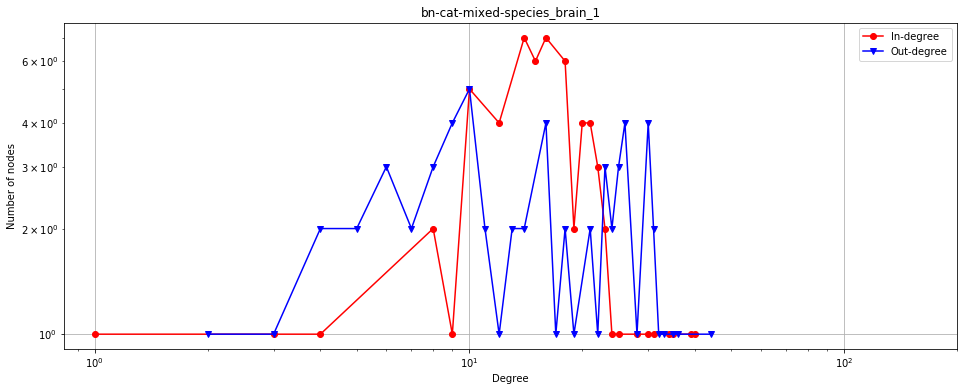

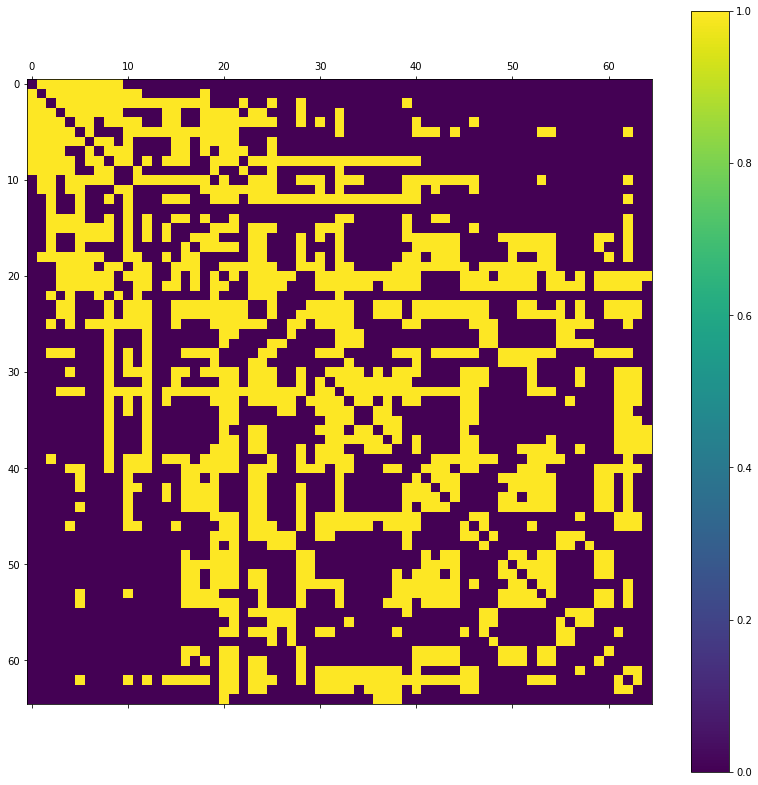

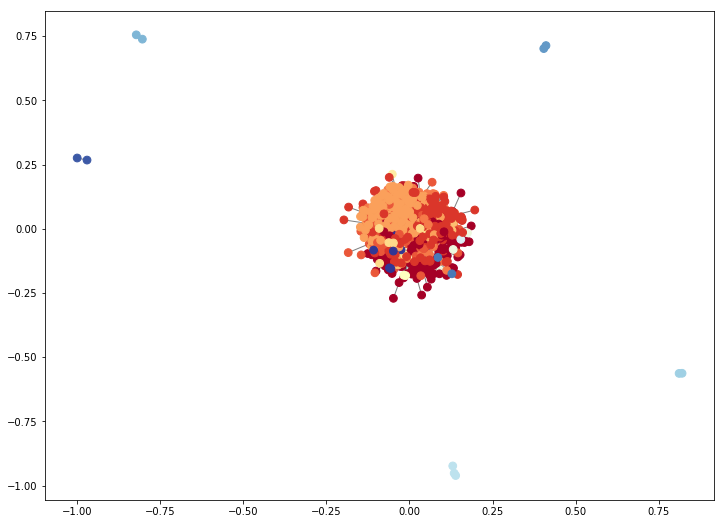

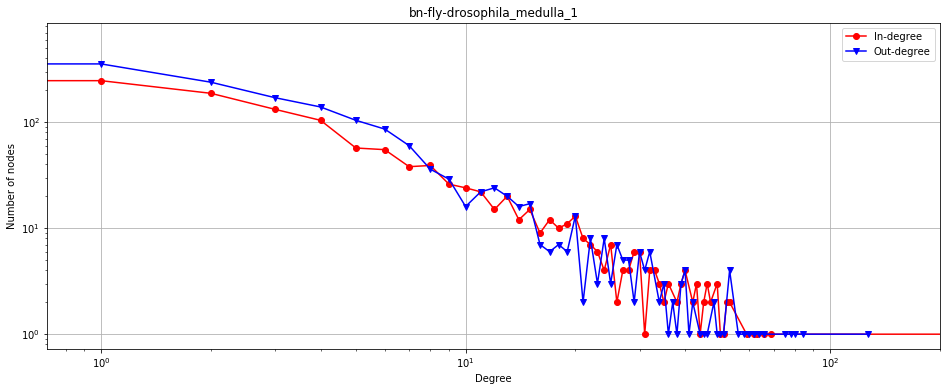

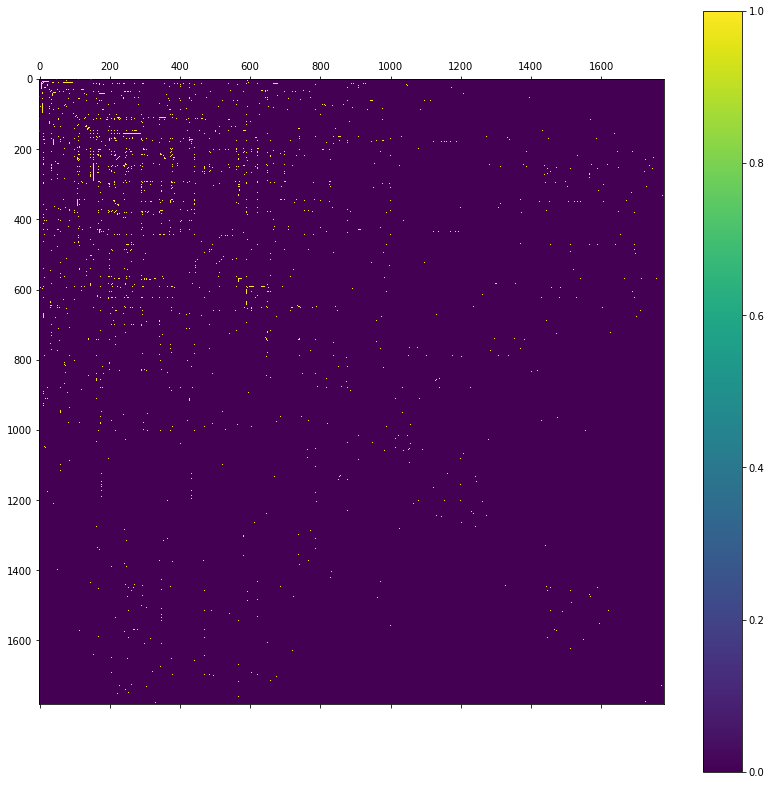

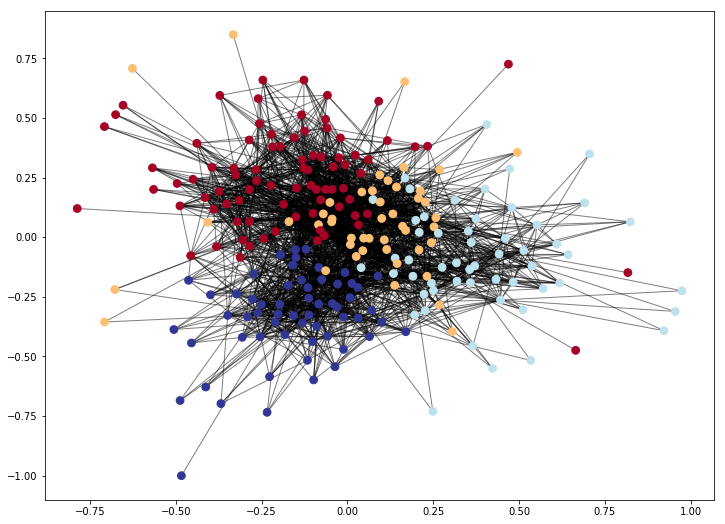

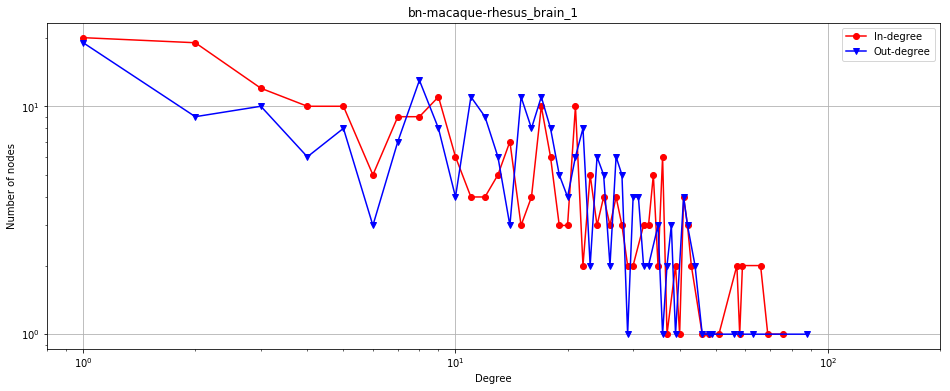

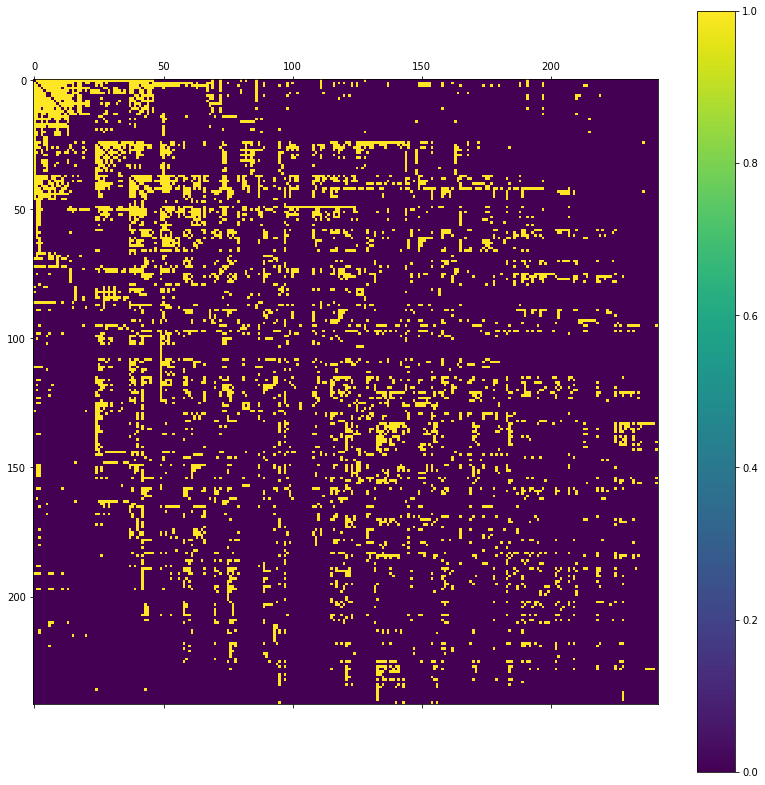

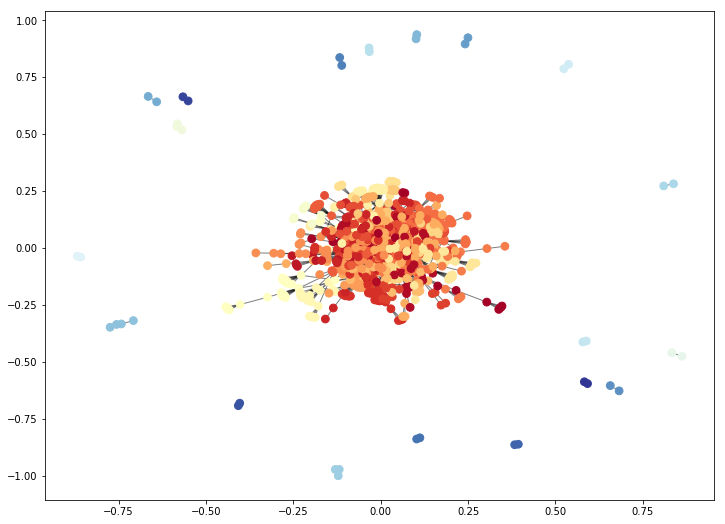

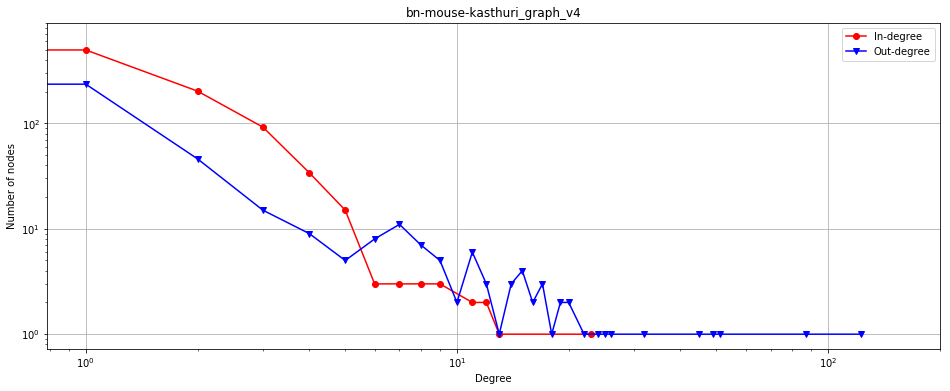

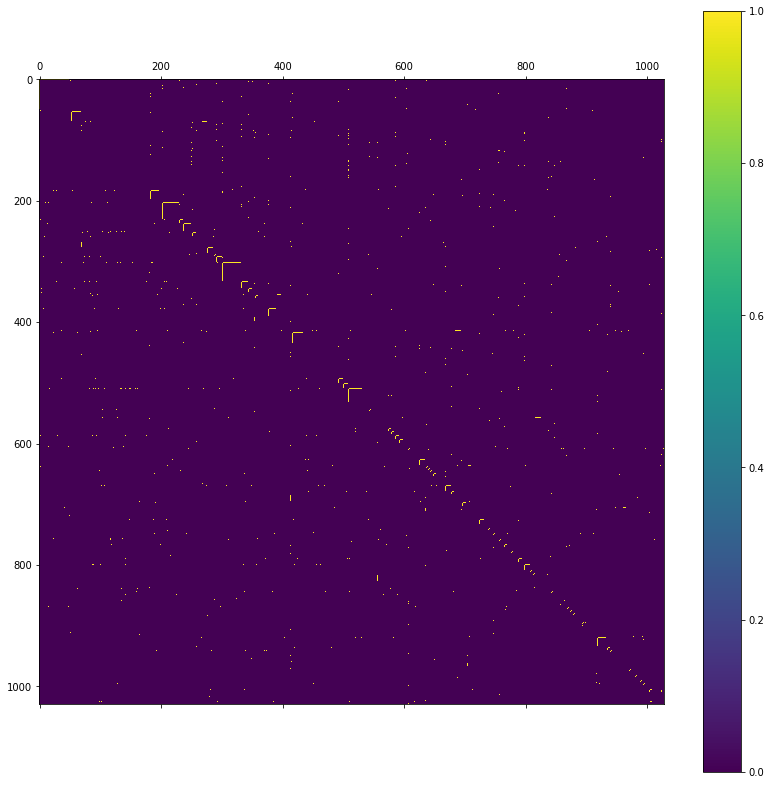

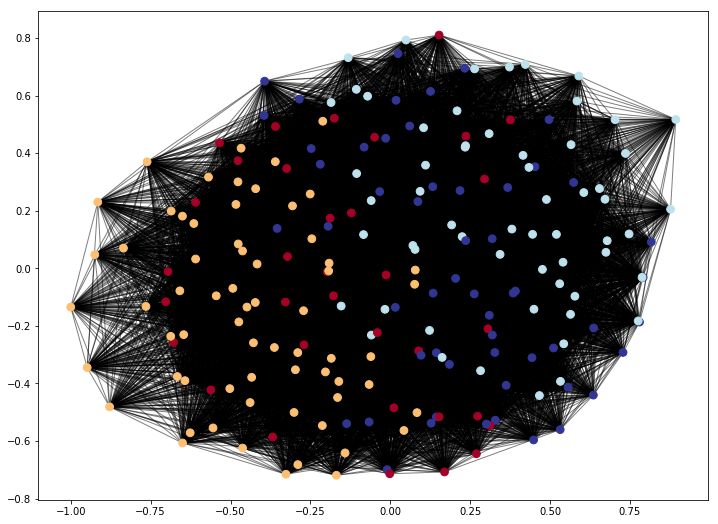

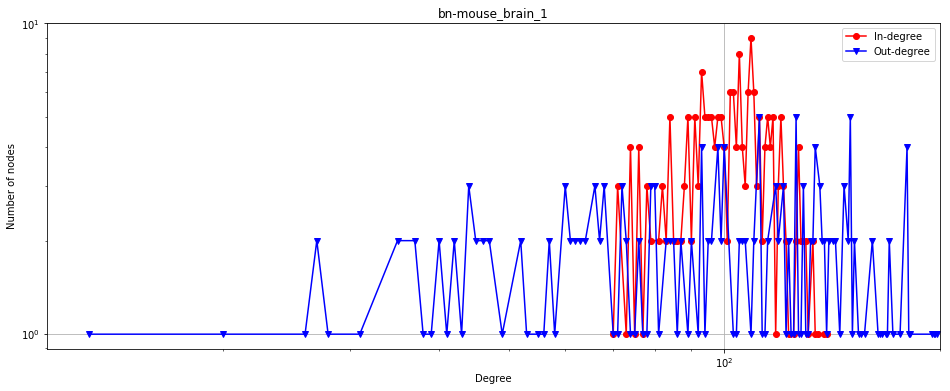

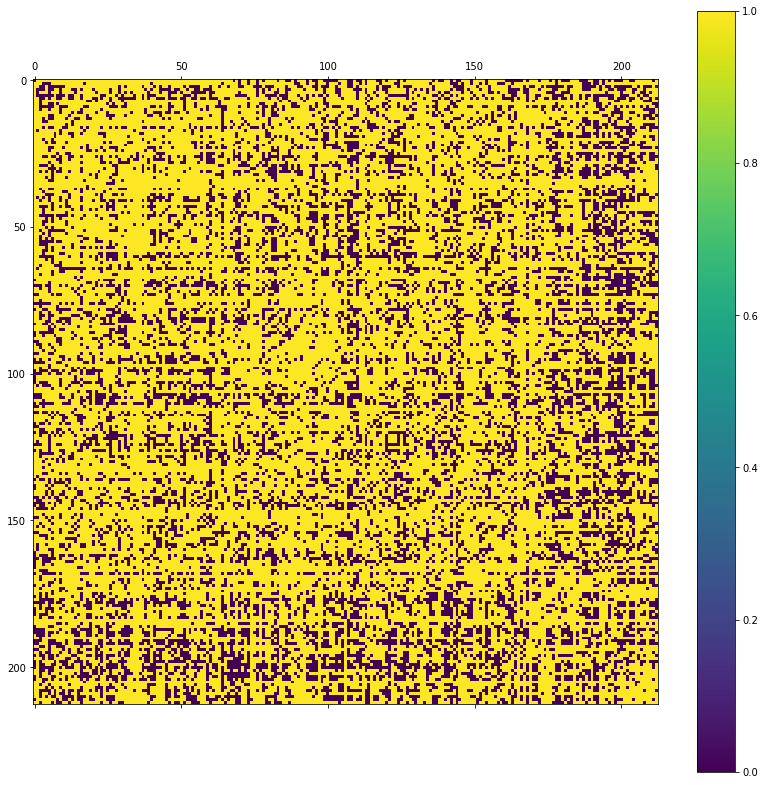

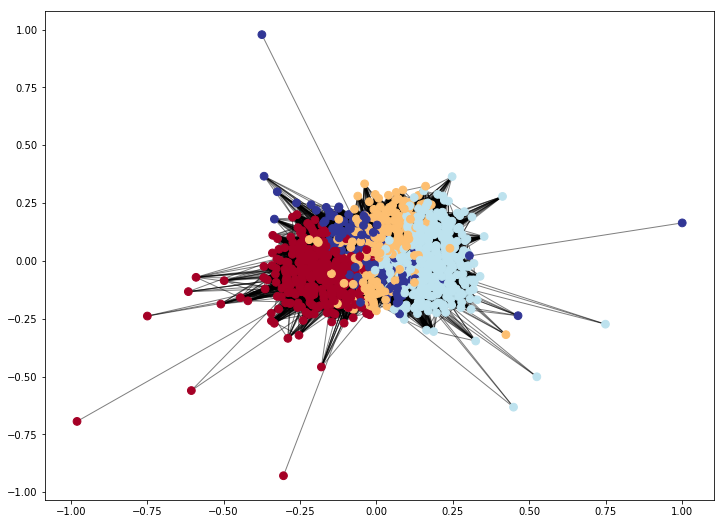

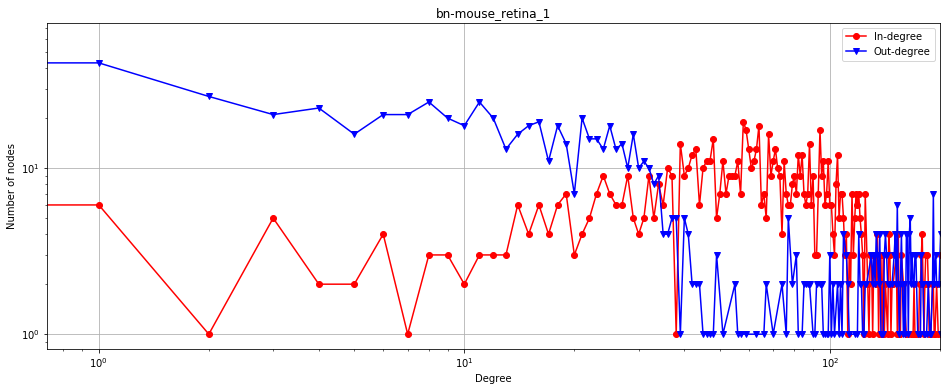

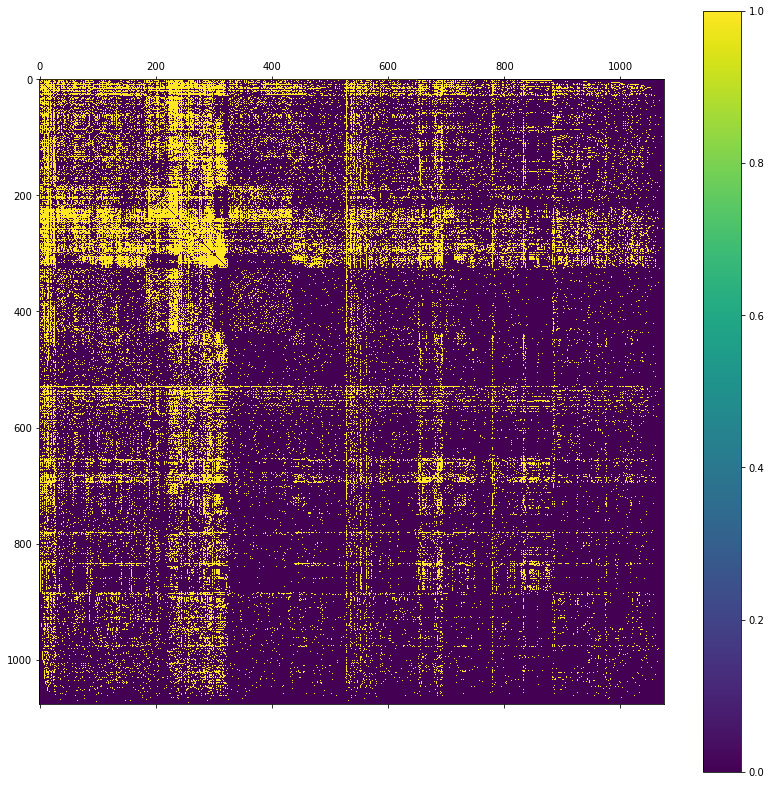

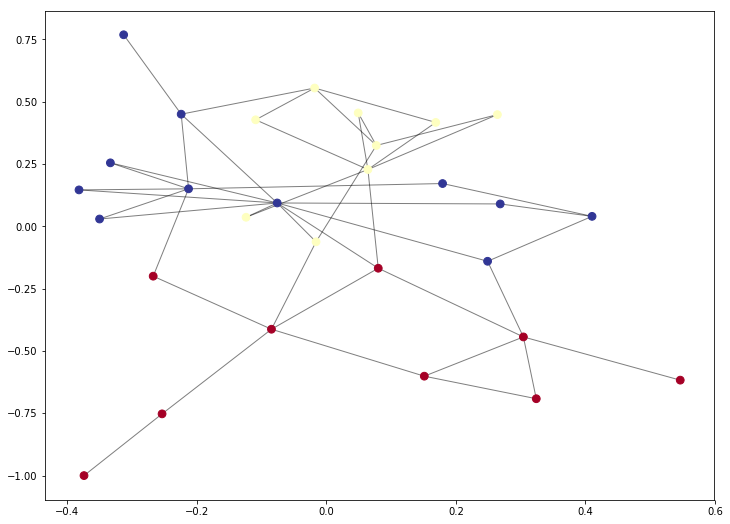

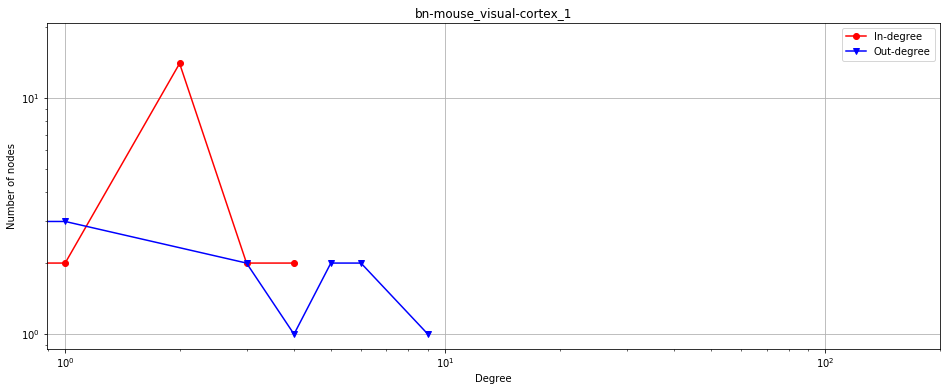

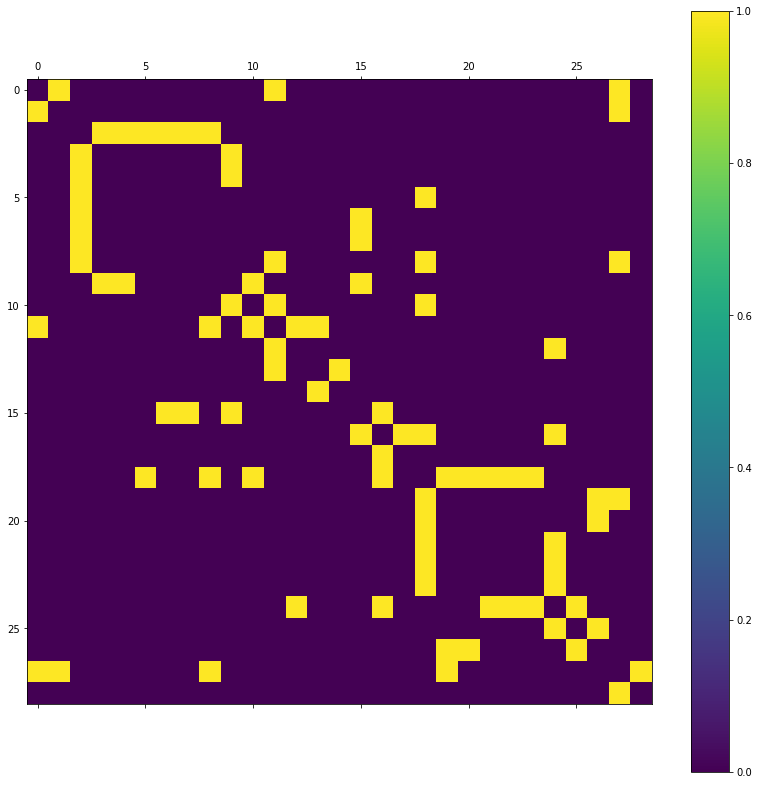

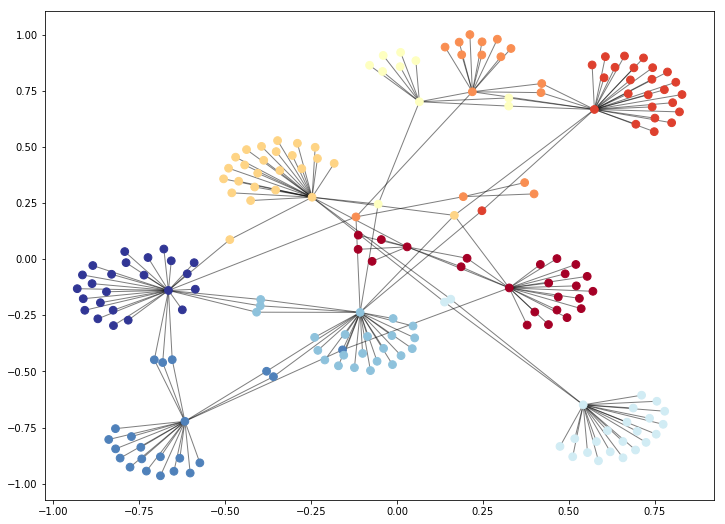

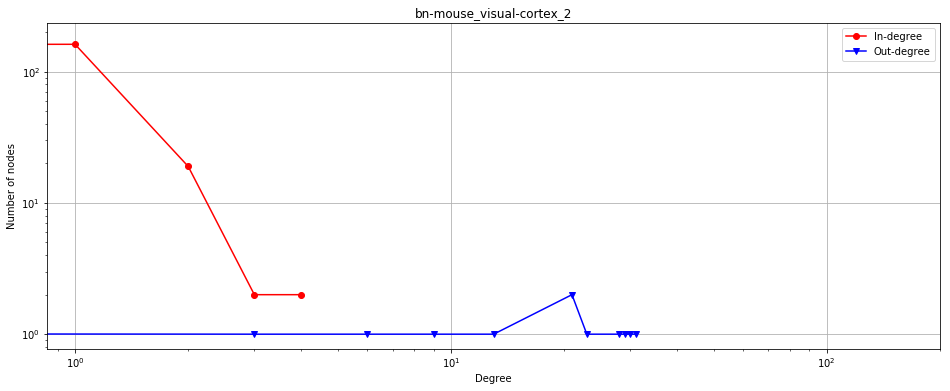

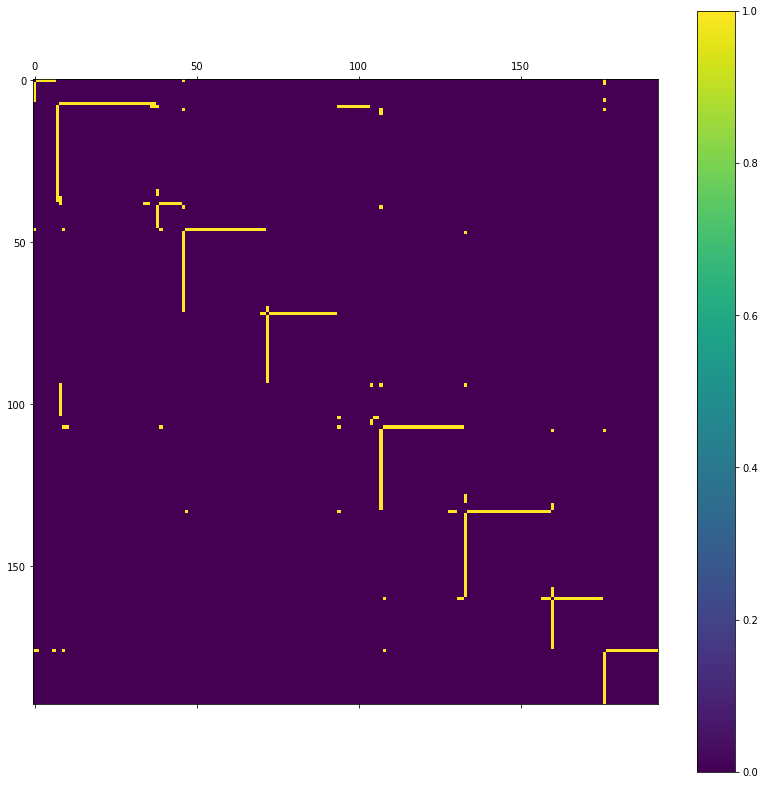

In [3]:
filenames = [filename for filename in listdir(dir_) if filename.endswith('.edges')]

for i in range(len(filenames)):
    file = filenames[i]
    if 'human' in file: continue
        
    G = nx.read_edgelist(dir_+file, create_using=nx.Graph(), nodetype=int)
    H = nx.read_edgelist(dir_+file, create_using=nx.DiGraph(), nodetype=int)
    
    plot_communities(G, file.split('.')[0])
    plot_distribution(H, file.split('.')[0])
    plot_matrix(G, file.split('.')[0])